## Arctic Heat

**AXCTD and XBT Profiles - all Raw**

Purpose: import clean and plot profiles

In [3]:
import pandas as pd
import os
import datetime

In [4]:
source_dir = '/Users/bell/ecoraid/2019/Additional_FieldData/ArcticHeat/AXBT_Data/'

source_file = [os.path.join(dp, f) for dp, dn,
   fn in os.walk(os.path.expanduser(source_dir)) for f in fn if ('dta' in f) and not ('clean' in f) ]


### Data Ingestion and data summary/statistics

A few lines to list and read the .iwg files into a dictionary of pandas dataframes.

The original .dta files have header as follows:   

```
Probe Type = AXBT     
       Date = 2018/05/26
       Time = 00:29:35.620
 
    Time     Depth    Frequency    (C)       (F) 
```

In [5]:
dfs = {}
for i,filename in enumerate(sorted(source_file)):
    try:
        header = pd.read_csv(filename,nrows=4,header=None)
        
        #parse date in header to add delta-t in columns to
        sd = header[0][1].split('= ')[-1].split('.')
        nofrag, frag = header[0][2].split('= ')[-1].split('.')
        st = datetime.datetime.strptime(sd[0] + ' ' + nofrag,'%Y/%m/%d %H:%M:%S')
        st = st.replace(microsecond=int(frag))
        
        columns = ['Time','Depth','Frequency','DegreeC','DegreeF']
        temp_data = pd.read_csv(filename,delimiter='\s+',skiprows=4,na_values='******')
        temp_data['DateTime'] = [st +datetime.timedelta(seconds=x[1]['Time']) for x in temp_data.iterrows()]
        temp_data = temp_data.set_index(pd.DatetimeIndex(temp_data['DateTime']))
        dfs.update({filename:temp_data})
        print(filename)
    except ValueError:
        print("{} failed to load".format(filename))
        continue
    except KeyError:
        columns = ['Frame#','Data','CRC','Depth','Temp','Cond','Salinity']
        temp_data = pd.read_csv(filename,delimiter='\s+',skiprows=4,na_values='*****')
        dfs.update({filename:temp_data})
        print(filename)


/Users/bell/ecoraid/2019/Additional_FieldData/ArcticHeat/AXBT_Data/20190717L2/log00000.dta
/Users/bell/ecoraid/2019/Additional_FieldData/ArcticHeat/AXBT_Data/20190717L2/log00001.dta
/Users/bell/ecoraid/2019/Additional_FieldData/ArcticHeat/AXBT_Data/20190717L2/log00002.dta
/Users/bell/ecoraid/2019/Additional_FieldData/ArcticHeat/AXBT_Data/20190717L2/log00003.dta
/Users/bell/ecoraid/2019/Additional_FieldData/ArcticHeat/AXBT_Data/20190717L2/log00004.dta
/Users/bell/ecoraid/2019/Additional_FieldData/ArcticHeat/AXBT_Data/20190717L2/log00005.dta
/Users/bell/ecoraid/2019/Additional_FieldData/ArcticHeat/AXBT_Data/20190717L2/log00006.dta
/Users/bell/ecoraid/2019/Additional_FieldData/ArcticHeat/AXBT_Data/20190717L2/log00007.dta
/Users/bell/ecoraid/2019/Additional_FieldData/ArcticHeat/AXBT_Data/20190719L1/log00000.dta
/Users/bell/ecoraid/2019/Additional_FieldData/ArcticHeat/AXBT_Data/20190719L1/log00001.dta
/Users/bell/ecoraid/2019/Additional_FieldData/ArcticHeat/AXBT_Data/20190719L1/log00002.dta

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

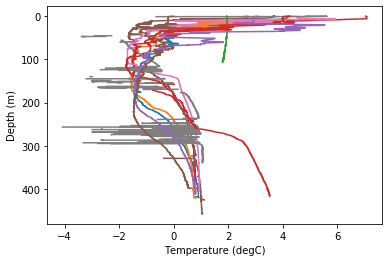

In [7]:
for ds, df in dfs.items():
    try:
        plt.plot(df['(C)'],df['Depth'])
        plt.ylabel('Depth (m)')
        plt.xlabel('Temperature (degC)')
    except:
        pass
    
ax = plt.gca()
ax.invert_yaxis()

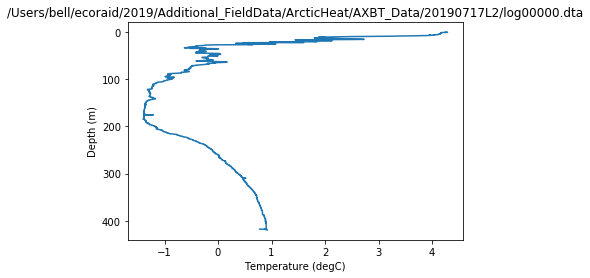

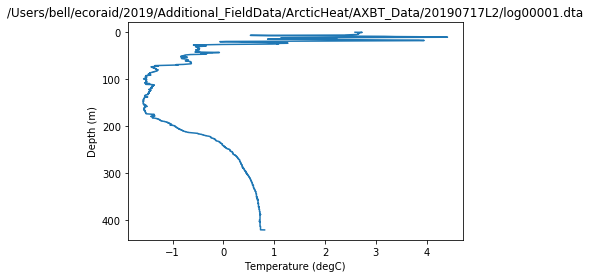

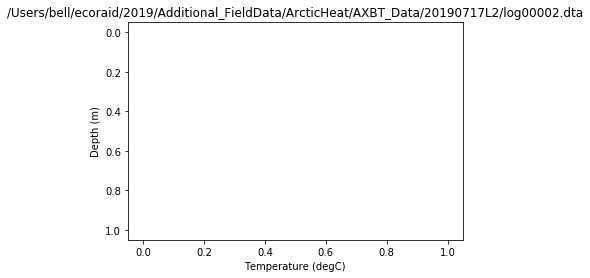

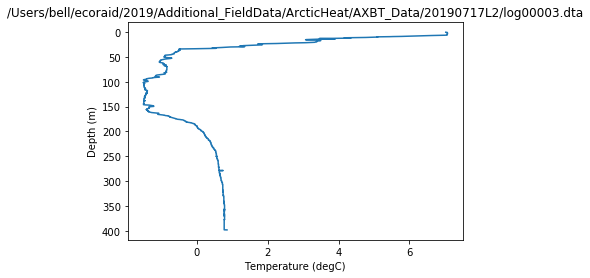

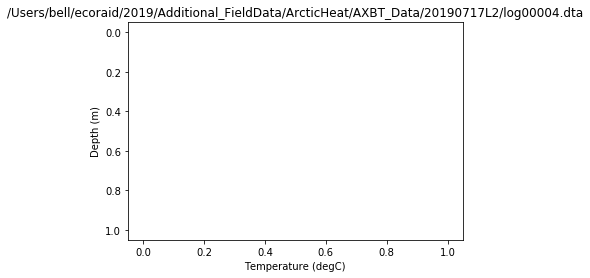

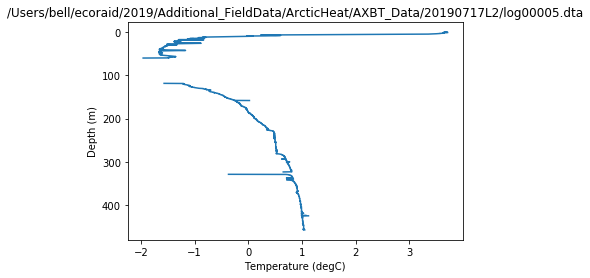

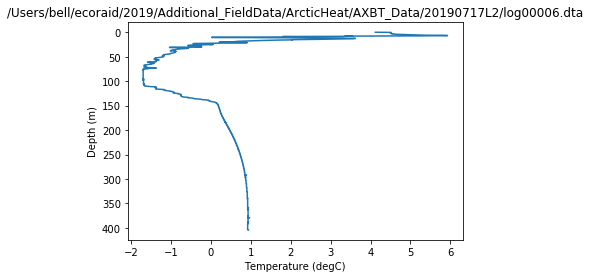

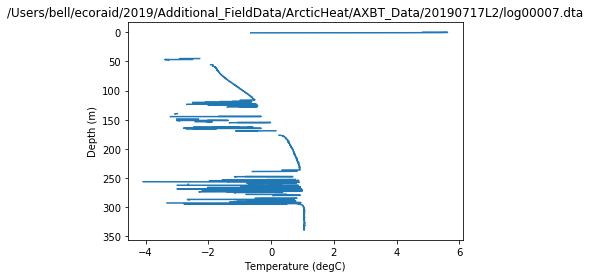

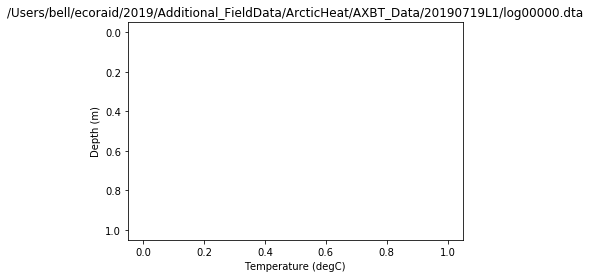

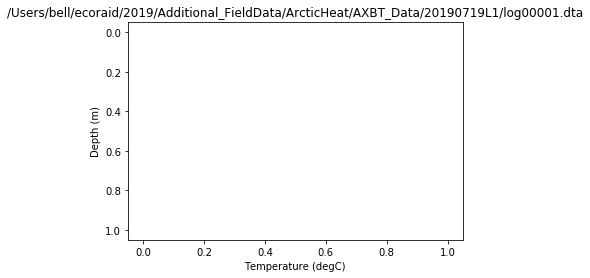

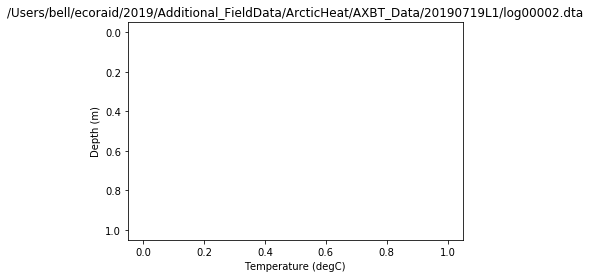

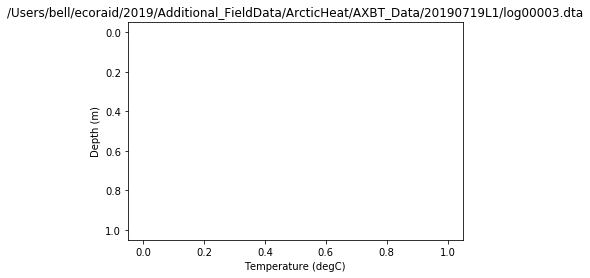

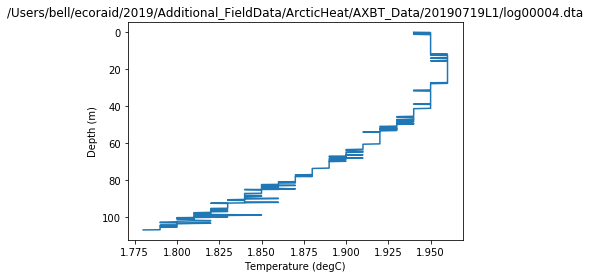

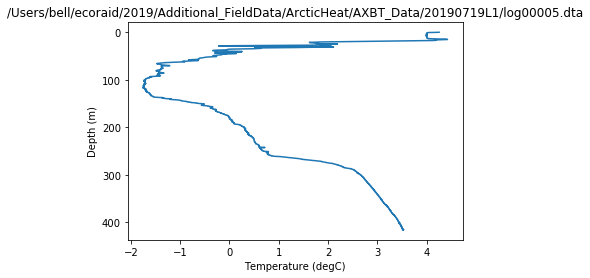

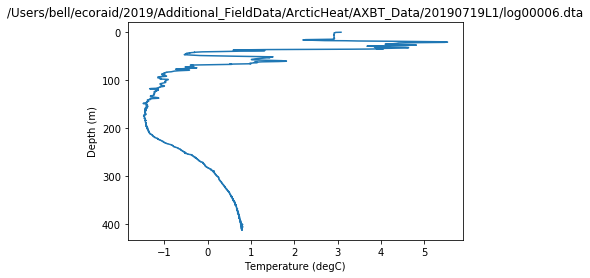

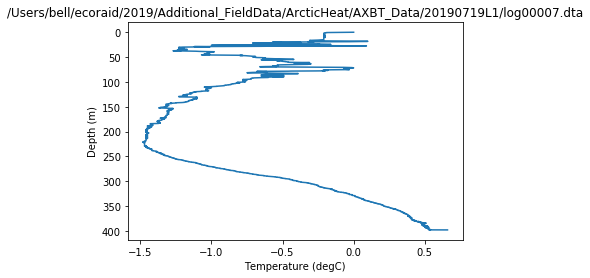

In [8]:
for ds, df in dfs.items():
    fig = plt.figure()
    try:
        plt.plot(df['(C)'],df['Depth'])
        plt.ylabel('Depth (m)')
        plt.xlabel('Temperature (degC)')
        ax = plt.gca()
        ax.invert_yaxis()
        plt.title(ds)
    except:
        pass
    


### AXCTD

Will have failed above in plots but will likely have been read in.

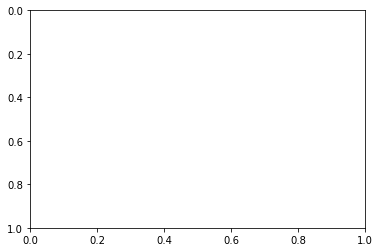

In [9]:
for ds, df in dfs.items():
    try:
        plt.plot(df['Temp'],df['Depth'])
        plt.ylabel('Depth (m)')
        plt.xlabel('Temperature (degC)')
    except:
        pass
    
ax = plt.gca()
ax.invert_yaxis()

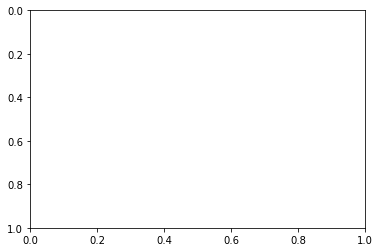

In [10]:
for ds, df in dfs.items():
    try:
        plt.plot(df['Salinity'],df['Depth'])
        plt.ylabel('Depth (m)')
        plt.xlabel('Salinity (PSU)')
    except:
        pass
    
ax = plt.gca()
ax.invert_yaxis()

In [11]:
### Alternatively, if we want the axis label on the same side (bottom or top)
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

for ds, df in dfs.items():
    try:
        df['Temp'] # fail out if key is non existent
        print(ds.split('/')[-1])
        fig, ax = plt.subplots(figsize=(2.25,5.5))
        cs = ax.plot(df['Temp'],df['Depth'],'r')
        ax3 = ax.twiny()
        ax3.spines["top"].set_position(("axes", 1.12))
        make_patch_spines_invisible(ax3)
        ax3.spines["top"].set_visible(True)
        cs = ax3.plot(df['Salinity'],df['Depth'],'c')

        ax.set_xlim([-2.5,5])
        ax3.set_xlim([20,35])

        plt.gca().invert_yaxis()

        ax.xaxis.set_label_position("top")
        ax.xaxis.set_ticks_position("top")
        ax.set_ylabel('Depth (m)')
        ax.set_xlabel('Temperature (°C)') 
        ax3.set_xlabel('Salinity') 
        
    except KeyError:
        pass
    
